In [187]:
from matplotlib import pyplot as plt
import numpy as np
import gymnasium as gym
import os
import seaborn as sns

In [188]:
cart_pole_results = './results/discrete/CartPole-v1/report'
acrobot_results = './results/discrete/Acrobot-v1/900'
pendulum_results = './results/continuous/Pendulum-v1/good_'
pendulum_results2 = './results/continuous/Pendulum-v1'
#report_cart_pole_plots = './report/CartPole-v1/plots'

In [189]:
def get_data_to_plot(results_path, epsilon_desired):
    scores_ = {}
    scores_avg_20_ = {}
    std_scores_ = {}
    std_scores_avg_20_ = {}
    terminations_ = {}
    truncations_ = {}
    time_steps_per_episode_ = {}
    # List of subdirectories in path
    for subdirectory in os.listdir(results_path):
        # List of files in subdirectory
        for file in os.listdir(os.path.join(results_path, subdirectory)):
            if subdirectory.startswith(epsilon_desired) and file == 'episode_logs.txt':
                with open(os.path.join(results_path, subdirectory, file), 'r') as f:
                    episode_logs = f.readlines()
                    scores = []
                    scores_avg_20 = []
                    std_scores = []
                    std_scores_avg_20 = []
                    time_steps_per_episode = []
                    # strip newline characters
                    for i, line in enumerate(episode_logs):
                        elements = line.split(',')
                        scores.append(float(elements[1].split()[1]))
                        scores_avg_20.append(float(elements[3].split()[1]))
                        std_scores.append(float(elements[6].split()[1]))
                        std_scores_avg_20.append(float(elements[7].split()[1]))
                        time_steps_per_episode.append(int(elements[4].split()[1]))
                        if i == len(episode_logs) - 1:
                            terminations_[subdirectory] = int(elements[10].split()[1])
                            truncations_[subdirectory]  = int(elements[11].split()[1])
                            scores_[subdirectory] = scores
                            scores_avg_20_[subdirectory] = scores_avg_20
                            std_scores_[subdirectory] = std_scores
                            std_scores_avg_20_[subdirectory] = std_scores_avg_20
                            time_steps_per_episode_[subdirectory] = time_steps_per_episode

    return scores_, scores_avg_20_, std_scores_, std_scores_avg_20_, terminations_, truncations_, time_steps_per_episode_

In [190]:
def format_configurations(config):
    parts = config.split('_')
    return f'C1: {parts[3]}, C2: {parts[5]}'

In [191]:
def plot_learning_curve(scores_avg_20, std_scores_avg_20, CR, max_episodes=1000, color=None):

    # Set Seaborn theme for the plots
    sns.set_theme(style="darkgrid")

    # Start a new figure
    plt.figure(figsize=(10, 6))

    # Plot each series in the dictionary
    for key in scores_avg_20:
        episodes = range(min(len(scores_avg_20[key]), max_episodes))
        running_avg = scores_avg_20[key][:max_episodes]
        running_std = std_scores_avg_20[key][:max_episodes]

        formatted_config = format_configurations(key)
        #print(formatted_config)

        # Plot the average score line
        sns.lineplot(x=episodes, y=running_avg, label=formatted_config, color=color)

        # Add the shaded area for standard deviation
        plt.fill_between(episodes, 
                         [a - b for a, b in zip(running_avg, running_std)], 
                         [a + b for a, b in zip(running_avg, running_std)], 
                         alpha=0.3)

    # Add title and labels
    plt.title(f'CR: {CR}')
    plt.xlabel('Episodes')
    plt.ylabel('Rewards (avg. over last 20 episodes)')
    plt.legend(title='PPO Hyperparameters', loc='upper left')

    # Save the plot
    plt.show()



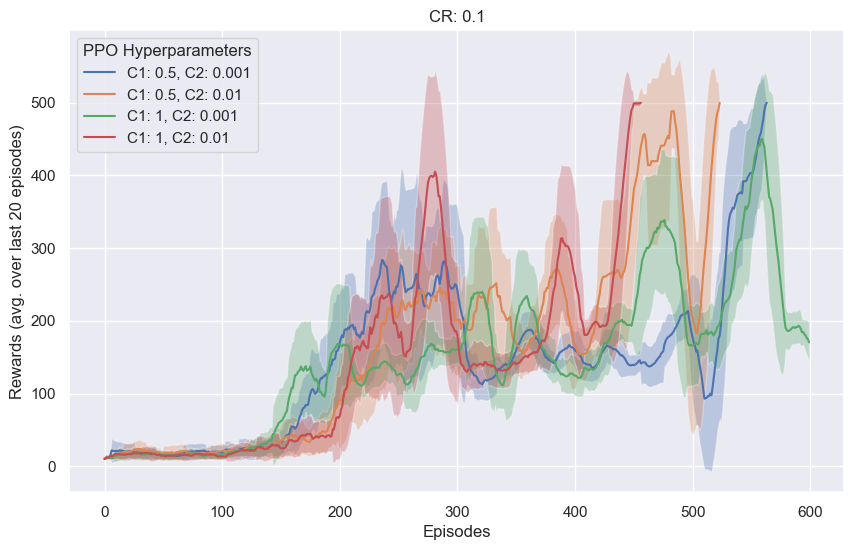

In [204]:
scores_, scores_avg_20_, std_scores_, std_scores_avg_20_, terminations_, truncations_, time_steps_per_episode_ = get_data_to_plot(cart_pole_results, 'epsilon_0.1')

# Plot the learning curve
plot_learning_curve(scores_avg_20_, std_scores_avg_20_, 0.1, 600)

In [193]:
# Print data 
# print('Scores:', scores_)
# print('Scores avg 20:', scores_avg_20_)
# print('Std Scores:', std_scores_)
# print('Std Scores avg 20:', std_scores_avg_20_)
# print('Terminations:', terminations_)
# print('Truncations:', truncations_)

print(len(scores_))

# Data from 1st config
config = list(scores_.keys())[0]
print(f'Config 1: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

# Data from 2nd config
config = list(scores_.keys())[1]
print(f'Config 2: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

# Data from 3rd config
config = list(scores_.keys())[2]
print(f'Config 3: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

# Data from 4th config
config = list(scores_.keys())[3]
print(f'Config 4: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')




4
Config 1: epsilon_0.1_c1_0.5_c2_0.001
Episodes: 564
Reward last 20: 500.0
Rewards average: 151.47517730496455
Timesteps average: 151.47517730496455
Terminations: 535
Truncations: 29
Config 2: epsilon_0.1_c1_0.5_c2_0.01
Episodes: 524
Reward last 20: 500.0
Rewards average: 171.54580152671755
Timesteps average: 171.54580152671755
Terminations: 469
Truncations: 55
Config 3: epsilon_0.1_c1_1_c2_0.001
Episodes: 2465
Reward last 20: 500.0
Rewards average: 172.69168356997972
Timesteps average: 172.69168356997972
Terminations: 2403
Truncations: 62
Config 4: epsilon_0.1_c1_1_c2_0.01
Episodes: 457
Reward last 20: 500.0
Rewards average: 144.0328227571116
Timesteps average: 144.0328227571116
Terminations: 419
Truncations: 38


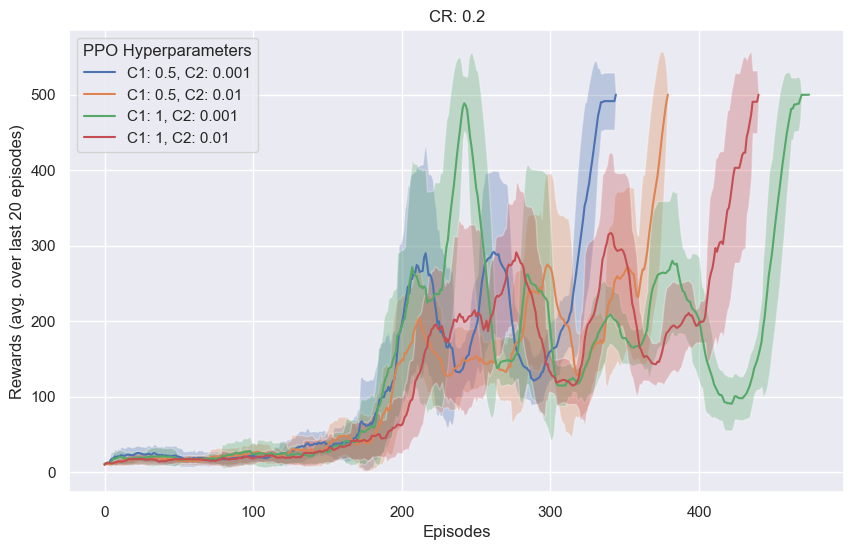

In [194]:
scores_, scores_avg_20_, std_scores_, std_scores_avg_20_, terminations_, truncations_, time_steps_per_episode_ = get_data_to_plot(cart_pole_results, 'epsilon_0.2')

# Plot the learning curve
plot_learning_curve(scores_avg_20_, std_scores_avg_20_, 0.2)

In [195]:
# Data from 1st config
config = list(scores_.keys())[0]
print(f'Config 1: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

# Data from 2nd config
config = list(scores_.keys())[1]
print(f'Config 2: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

# Data from 3rd config
config = list(scores_.keys())[2]
print(f'Config 3: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

# Data from 4th config
config = list(scores_.keys())[3]
print(f'Config 4: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

Config 1: epsilon_0.2_c1_0.5_c2_0.001
Episodes: 345
Reward last 20: 500.0
Rewards average: 136.00289855072464
Timesteps average: 136.00289855072464
Terminations: 313
Truncations: 32
Config 2: epsilon_0.2_c1_0.5_c2_0.01
Episodes: 380
Reward last 20: 500.0
Rewards average: 124.47894736842105
Timesteps average: 124.47894736842105
Terminations: 354
Truncations: 26
Config 3: epsilon_0.2_c1_1_c2_0.001
Episodes: 475
Reward last 20: 500.0
Rewards average: 157.60631578947368
Timesteps average: 157.60631578947368
Terminations: 421
Truncations: 54
Config 4: epsilon_0.2_c1_1_c2_0.01
Episodes: 441
Reward last 20: 500.0
Rewards average: 142.3469387755102
Timesteps average: 142.3469387755102
Terminations: 409
Truncations: 32


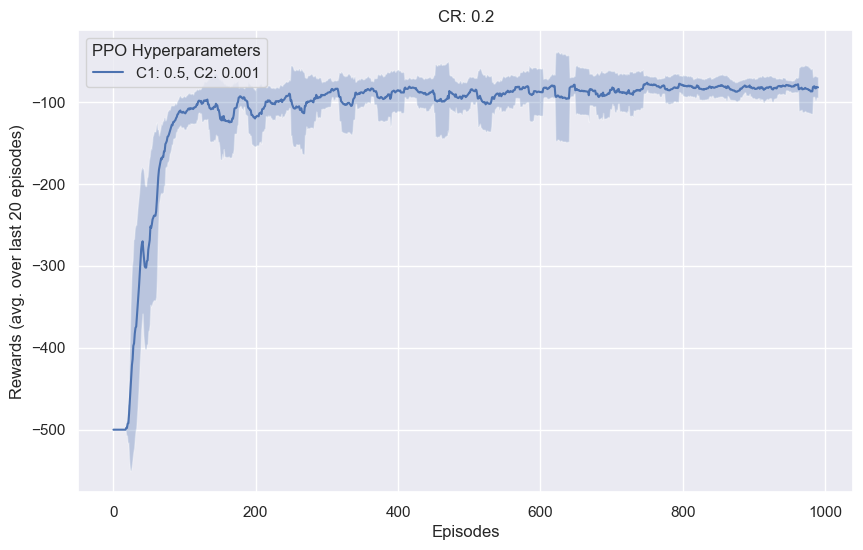

In [196]:
scores_, scores_avg_20_, std_scores_, std_scores_avg_20_, terminations_, truncations_, time_steps_per_episode_ = get_data_to_plot(acrobot_results, 'epsilon_0.2')

# Plot the learning curve
plot_learning_curve(scores_avg_20_, std_scores_avg_20_, 0.2)


In [197]:
# Data from 1st config
config = list(scores_.keys())[0]
print(f'Config 1: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

Config 1: epsilon_0.2_c1_0.5_c2_0.001
Episodes: 991
Reward last 20: -82.05
Rewards average: -106.87991927346116
Timesteps average: 107.85973763874874
Terminations: 971
Truncations: 20


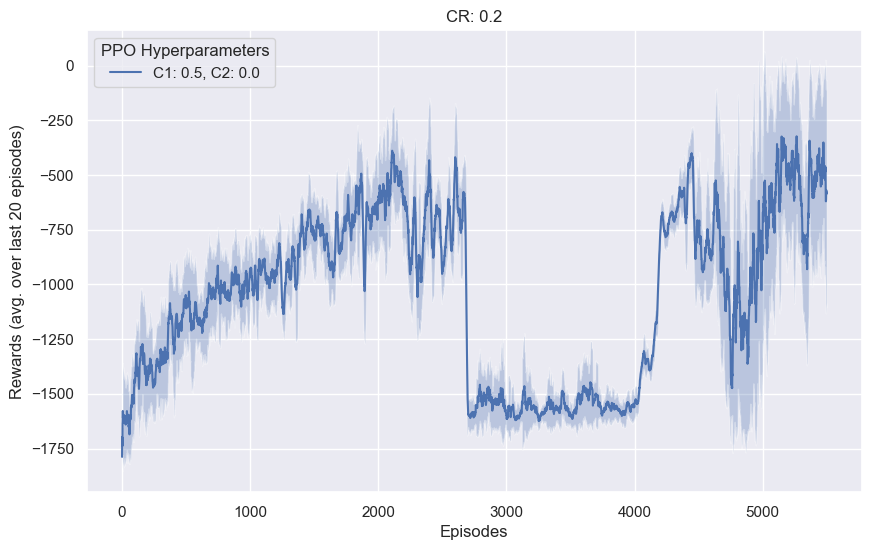

In [198]:
scores_, scores_avg_20_, std_scores_, std_scores_avg_20_, terminations_, truncations_, time_steps_per_episode_ = get_data_to_plot(pendulum_results, 'epsilon_0.2')

# Plot the learning curve
plot_learning_curve(scores_avg_20_, std_scores_avg_20_, 0.2, 5500)


In [199]:
# Data from 1st config
config = list(scores_.keys())[0]
print(f'Config 1: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]}')
print(f'Rewards average: {np.mean(scores_[config])}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

Config 1: epsilon_0.2_c1_0.5_c2_0.0
Episodes: 5795
Reward last 20: -297.1
Rewards average: -1021.2583986194995
Timesteps average: 200.0
Terminations: 0
Truncations: 5795


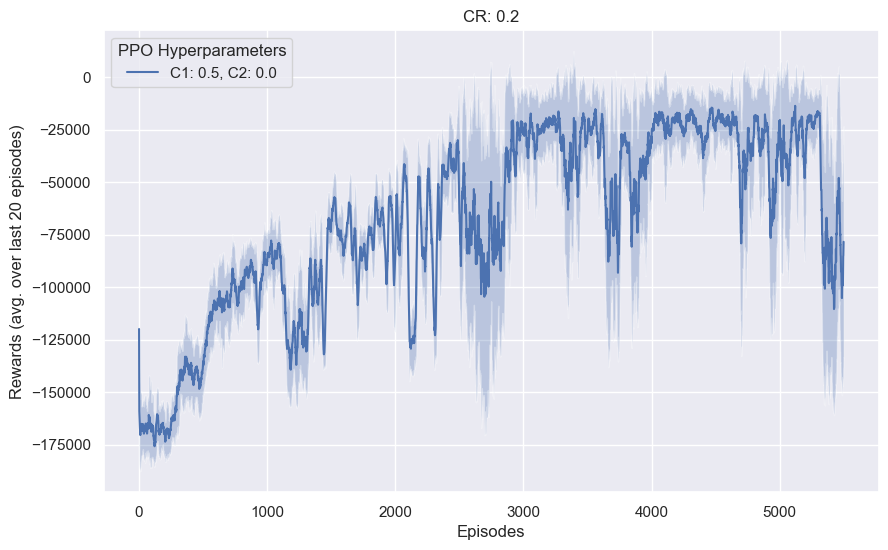

In [200]:
scores_, scores_avg_20_, std_scores_, std_scores_avg_20_, terminations_, truncations_, time_steps_per_episode_ = get_data_to_plot(pendulum_results2, 'epsilon_0.2')

# Plot the learning curve
plot_learning_curve(scores_avg_20_, std_scores_avg_20_, 0.2, 5500)

In [201]:
# Data from 1st config
config = list(scores_.keys())[0]
print(f'Config 1: {config}')
print(f'Episodes: {len(scores_[config])}')
print(f'Reward last 20: {scores_avg_20_[config][-1]/100}')
print(f'Rewards average: {np.mean(scores_[config])/100}')
print(f'Timesteps average: {np.mean(time_steps_per_episode_[config])}')
print(f'Terminations: {terminations_[config]}')
print(f'Truncations: {truncations_[config]}')

Config 1: epsilon_0.2_c1_0.5_c2_0.0
Episodes: 5722
Reward last 20: -359.7709
Rewards average: -676.3683319818246
Timesteps average: 200.0
Terminations: 0
Truncations: 5722


In [202]:
"""env = gym.make("LunarLander-v2", continuous= True, render_mode='rgb_array')
"""

'env = gym.make("LunarLander-v2", continuous= True, render_mode=\'rgb_array\')\n'

In [203]:
"""checkpoint_directory = './models'
env_type = 'continuous'
env_name = 'MountainCarContinuous-v0'

batch_size = 5
actorn_lr = 0.0005 
critic_lr = 0.001,
gamma = 0.99 
n_epochs = 64
epsilon = 0.2
gae_lambda = 0.95

# Load PPO agent from checkpoint
agent = PPOAgentContinuous(
        n_actions=env.action_space.shape[0], input_dims=env.observation_space.shape,
        checkpoint_directory=checkpoint_directory, batch_size=batch_size, clip_ratio=epsilon, 
        actorn_lr=actorn_lr, critic_lr=critic_lr, gamma=gamma, gae_lambda=gae_lambda, n_epochs=n_epochs, env_name=env.spec.id
    )
agent.load_models(checkpoint_directory, env_type, env_name)

# Record video from the agent"""


"checkpoint_directory = './models'\nenv_type = 'continuous'\nenv_name = 'MountainCarContinuous-v0'\n\nbatch_size = 5\nactorn_lr = 0.0005 \ncritic_lr = 0.001,\ngamma = 0.99 \nn_epochs = 64\nepsilon = 0.2\ngae_lambda = 0.95\n\n# Load PPO agent from checkpoint\nagent = PPOAgentContinuous(\n        n_actions=env.action_space.shape[0], input_dims=env.observation_space.shape,\n        checkpoint_directory=checkpoint_directory, batch_size=batch_size, clip_ratio=epsilon, \n        actorn_lr=actorn_lr, critic_lr=critic_lr, gamma=gamma, gae_lambda=gae_lambda, n_epochs=n_epochs, env_name=env.spec.id\n    )\nagent.load_models(checkpoint_directory, env_type, env_name)\n\n# Record video from the agent"